### II: EDA

In this notebook, I will be performing Exploratory Data Analysis on the body landmark data points collected in Notebook I. The goals for this notebook are:
1) Simplify the 33 data landmark points into laymen terms to see how they are related to human posture analysis (will be shown via statistical analysis, image overlays)
2) Understand the key differentiators between a good and bad posture, for e.g. what angles between which landamarks are useful in determining a good posture.
3) Eventually, understand which landmark data points might be selected as features during modelling to determine a good posture.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
import seaborn as sns
import cv2


#### Example of Good Posture: <br>

<img src="run-walk-posture.jpg"  style="height:400px" />


In [71]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [72]:
df_bad = pd.read_csv('Pose_keypoints_bad.csv')
df_bad.head()

df_good = pd.read_csv('Pose_keypoints_good.csv')
df_good.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Good,0.427481,0.432218,0.187747,0.999349,0.433324,0.424074,0.148867,0.998281,0.434497,...,0.229658,0.889561,0.670334,0.664551,-0.064846,0.988610,0.474645,0.799503,0.198858,0.913017
1,Good,0.427867,0.424335,0.103592,0.999405,0.435398,0.416132,0.074502,0.998436,0.436960,...,0.171699,0.896321,0.646353,0.702969,-0.049465,0.989388,0.574099,0.800178,0.147779,0.918380
2,Good,0.437734,0.413582,0.081666,0.999456,0.443536,0.406205,0.056616,0.998587,0.445162,...,-0.332621,0.904731,0.526356,0.725758,-0.026678,0.989607,0.674077,0.800791,-0.391390,0.925486
3,Good,0.441794,0.404654,0.074183,0.999448,0.448542,0.397865,0.044298,0.998694,0.450451,...,-0.278002,0.912920,0.418003,0.741679,0.014452,0.988432,0.749979,0.780808,-0.335191,0.931552
4,Good,0.444895,0.399103,0.001690,0.999498,0.451033,0.391476,-0.031034,0.998821,0.452720,...,-0.054553,0.921146,0.319029,0.749560,-0.108193,0.988595,0.825690,0.735513,-0.097319,0.937508


In [73]:
df = pd.concat([df_bad, df_good], axis=0, ignore_index=True)
df['good_posture'] = df['class'].apply(lambda x: 1 if x == 'Good' else 0)
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,v31,x32,y32,z32,v32,x33,y33,z33,v33,good_posture
0,Bad,0.597514,0.330045,-0.046739,0.999786,0.595233,0.314657,-0.039935,0.999435,0.594381,...,0.986479,0.542886,0.811219,0.140850,0.936010,0.519139,0.821335,-0.042727,0.995285,0
1,Bad,0.603381,0.325570,-0.049170,0.999806,0.601188,0.310604,-0.040726,0.999489,0.600242,...,0.985957,0.541942,0.809034,0.138972,0.930692,0.536733,0.821338,-0.048026,0.994957,0
2,Bad,0.614878,0.315903,-0.031407,0.999825,0.613352,0.302009,-0.020730,0.999540,0.612598,...,0.986882,0.542489,0.811047,0.129956,0.932926,0.563722,0.822904,-0.049756,0.995270,0
3,Bad,0.624886,0.308227,-0.035477,0.999842,0.623481,0.295145,-0.026631,0.999585,0.622720,...,0.987635,0.539751,0.811104,0.098917,0.936107,0.592707,0.822877,-0.048756,0.995534,0
4,Bad,0.636889,0.295799,-0.043732,0.999856,0.634686,0.282637,-0.032385,0.999624,0.634024,...,0.988365,0.539935,0.810745,0.093304,0.938698,0.613125,0.822549,-0.048148,0.995753,0


In [74]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,v31,x32,y32,z32,v32,x33,y33,z33,v33,good_posture
count,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,...,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.489351,0.310098,-0.103770,0.998563,0.489274,0.282535,-0.104224,0.998526,0.490194,0.280996,...,0.598976,0.520475,1.146601,0.134439,0.518633,0.502951,1.192496,0.073281,0.578577,0.486916
std,0.111519,0.114437,0.123013,0.006828,0.112920,0.109781,0.118392,0.006162,0.113140,0.109290,...,0.381817,0.138632,0.451344,0.249888,0.430155,0.139357,0.467792,0.178820,0.403555,0.499859
min,-0.020505,-0.108444,-0.652493,0.805949,-0.013616,-0.126093,-0.640026,0.826938,-0.013492,-0.125314,...,0.000294,0.000066,0.174037,-0.656764,0.000222,-0.000393,0.277891,-0.475098,0.000346,0.000000
25%,0.440504,0.218740,-0.170203,0.999470,0.440400,0.199861,-0.173875,0.999376,0.438440,0.199358,...,0.221141,0.445613,0.827565,-0.063193,0.086904,0.409352,0.839117,-0.072811,0.133204,0.000000
50%,0.486084,0.347536,-0.092988,0.999818,0.483611,0.310313,-0.091452,0.999781,0.485254,0.308803,...,0.783893,0.524063,0.936583,0.134392,0.458614,0.509248,0.962796,0.072277,0.706215,0.000000
75%,0.539146,0.387306,-0.032474,0.999940,0.539671,0.354050,-0.028098,0.999933,0.544214,0.351431,...,0.954697,0.607728,1.407454,0.315183,0.960441,0.588289,1.512669,0.199993,0.967417,1.000000
max,1.039752,0.867214,0.587195,1.000000,1.036630,0.864411,0.540488,0.999999,1.035088,0.864875,...,0.992624,1.015766,2.430448,0.906308,0.999240,1.037150,2.543757,0.817636,0.996433,1.000000


#### 1. Visibility of Landmarks

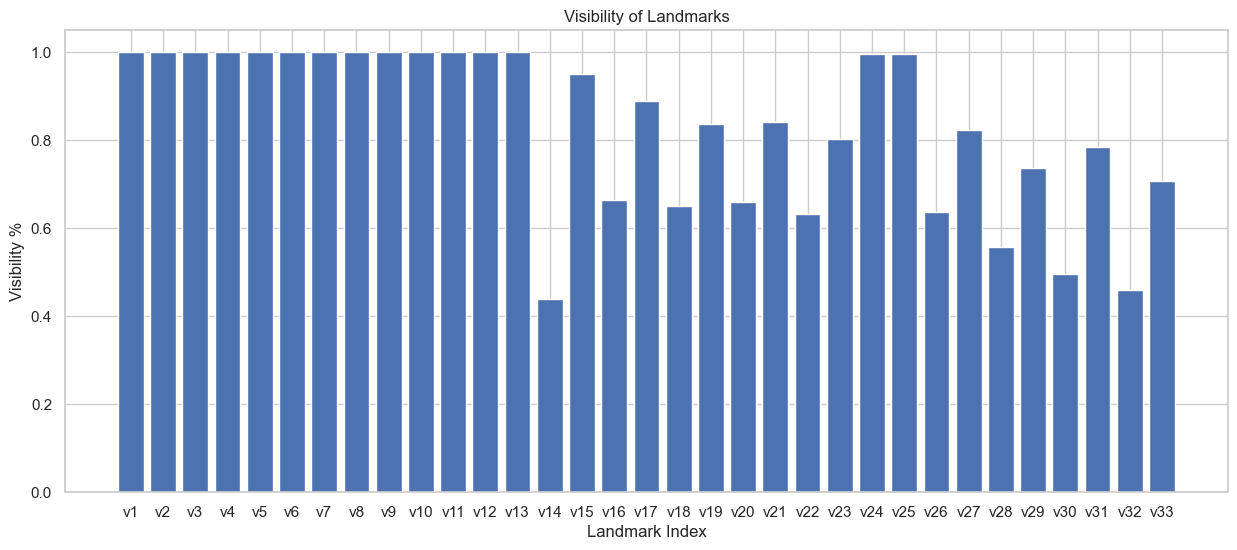

In [75]:
# Bar chart for visibility of landmarks
visibility_columns = df.filter(regex='^v', axis=1)
visibility_counts = visibility_columns.median()
plt.figure(figsize=(15, 6))
plt.bar(visibility_counts.index, visibility_counts.values)
plt.xlabel('Landmark Index')
plt.ylabel('Visibility %')
plt.title('Visibility of Landmarks')


plt.show()

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

Note that index 1 in the data points collected from modelling represents index 0 in the image above, i.e v1 represents the visibility of `0.nose`
From the above plot, we can see that points v14, v28, v30 and v32 are less visible. These points are the 'left_elbow', 'left_ankle', 'left_heel', 'left_foot_index'. This is perhaps due to the training data videos and images that did not capture these body parts. However, these points are not critical in posture analysis, hence is acceptable.

#### 2. Sample output of mediapipe for good and bad postures
Here, we can see how mediapipe identifies the landmark data points of the body and the difference between a good and bad posture.

#### 3. Calculating Angles

In [107]:
# Create a function to calculate 3 sets of coordinate points within a 2D space 

def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    # Calculate angles for all rows using vector operations
    radians = np.arctan2(c[:, 1] - b[:, 1], c[:, 0] - b[:, 0]) - np.arctan2(a[:, 1] - b[:, 1], a[:, 0] - b[:, 0])
    angles = np.abs(radians * 180.0 / np.pi)
    
    # Ensure angles are within [0, 360) degrees
    angles = np.where(angles > 180.0, 360 - angles, angles)
    
    return angles


In [77]:
# defining important landmarks for posture analysis
nose = df[['x1','y1']]

left_eye = df[['x3','y3']]
left_ear = df[['x8','y8']]
left_shoulder = df[['x12','y12']]
left_hip = df[['x24','y24']]
left_knee = df[['x26','y26']]

right_eye = df[['x6','y6']]
right_ear = df[['x9','y9']]
right_shoulder = df[['x13','y13']]
right_hip = df[['x25','y25']]
right_knee = df[['x27','y27']]

#### 4. Exploring difference in Mean of Landmark Coordinates for Good vs Bad postures

In [106]:
# Create list of more relevant landmark coordinate columns
landmark_coordinate_columns = [
    "x1", "y1", "x8", "y8", "x3", "y3", "x6", "y6", "x12", "y12", "x24", "y24", "x26", "y26", "x9", "y9", "x13", "y13", "x25", "y25", "x27", "y27"
]

# Get the landmark coordinates for the good and bad poses.
good_pose_landmarks = df[df['class'] == "Good"]
bad_pose_landmarks = df[df['class'] == "Bad"]

# Calculate the mean and standard deviation for the landmark coordinates in each group.
mean_good = good_pose_landmarks[landmark_coordinate_columns].mean().round(2)
std_good = good_pose_landmarks[landmark_coordinate_columns].std().round(2)
mean_bad = bad_pose_landmarks[landmark_coordinate_columns].mean().round(2)
std_bad = bad_pose_landmarks[landmark_coordinate_columns].std().round(2)

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Landmark': landmark_coordinate_columns,
    'Mean Good': mean_good.values,
    'Std Good': std_good.values,
    'Mean Bad': mean_bad.values,
    'Std Bad': std_bad.values
})

# Display the DataFrame
print(results_df)

   Landmark  Mean Good  Std Good  Mean Bad  Std Bad
0        x1       0.50      0.11      0.47     0.11
1        y1       0.25      0.10      0.36     0.10
2        x8       0.50      0.11      0.48     0.13
3        y8       0.24      0.11      0.31     0.09
4        x3       0.50      0.11      0.48     0.11
5        y3       0.24      0.11      0.32     0.10
6        x6       0.50      0.11      0.47     0.11
7        y6       0.24      0.11      0.33     0.10
8       x12       0.50      0.11      0.48     0.18
9       y12       0.33      0.10      0.46     0.10
10      x24       0.50      0.11      0.47     0.20
11      y24       0.56      0.10      0.90     0.21
12      x26       0.50      0.12      0.52     0.12
13      y26       0.71      0.12      1.01     0.35
14       x9       0.49      0.11      0.46     0.13
15       y9       0.24      0.11      0.32     0.09
16      x13       0.49      0.11      0.43     0.16
17      y13       0.33      0.10      0.48     0.08
18      x25 

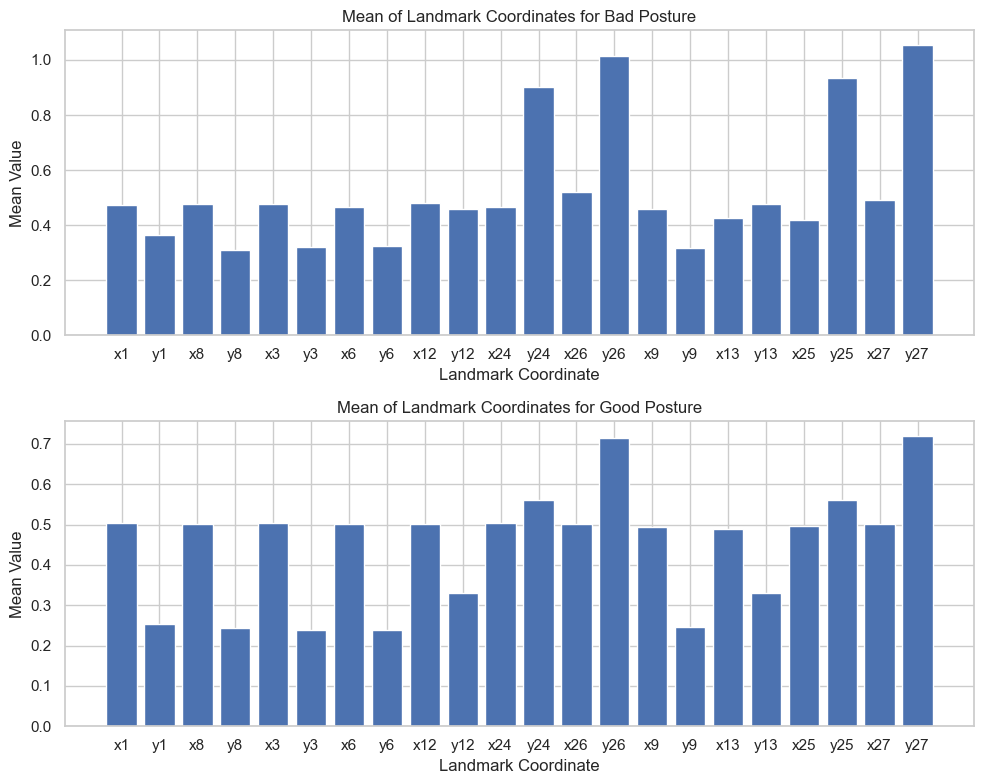

In [80]:

# Create a list of the landmark coordinate columns.
landmark_coordinate_columns = ["good_posture",
 "x1", "y1", "x8", "y8","x3", "y3", "x6", "y6", "x12", "y12", "x24", "y24", "x26", "y26", "x9", "y9", "x13", "y13", "x25", "y25", "x27", "y27"
]

# Filter the data by good_posture
good_posture_0 = df[df['good_posture'] == 0]
good_posture_1 = df[df['good_posture'] == 1]

# Calculate the mean of the landmark coordinates for each column.
column_means_0 = good_posture_0[landmark_coordinate_columns].mean(axis=0)
column_means_1 = good_posture_1[landmark_coordinate_columns].mean(axis=0)
column_means_0 = column_means_0.drop("good_posture")
column_means_1 = column_means_1.drop("good_posture")


# Visualize the mean of the landmark coordinates for each column.
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].bar(column_means_0.index, column_means_0.values)
axs[0].set_xlabel("Landmark Coordinate")
axs[0].set_ylabel("Mean Value")
axs[0].set_title("Mean of Landmark Coordinates for Bad Posture")

axs[1].bar(column_means_1.index, column_means_1.values)
axs[1].set_xlabel("Landmark Coordinate")
axs[1].set_ylabel("Mean Value")
axs[1].set_title("Mean of Landmark Coordinates for Good Posture")

plt.tight_layout()
plt.show()


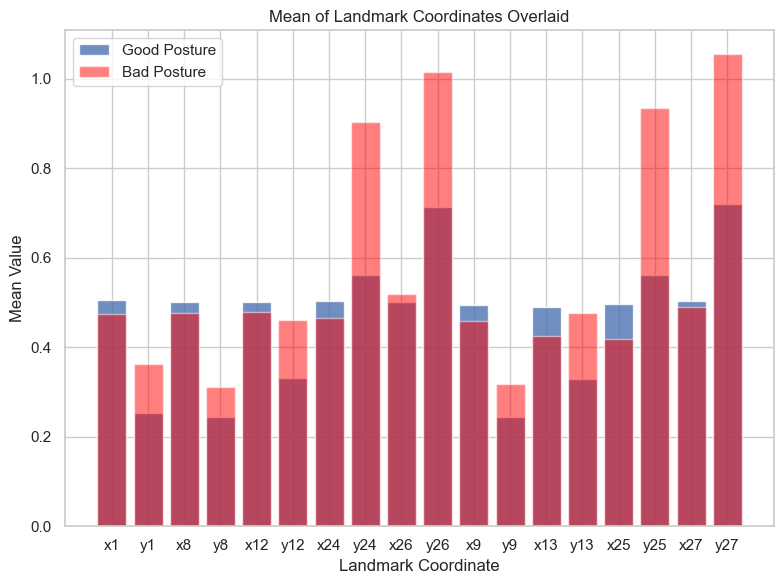

In [81]:

# Create a list of the landmark coordinate columns.
landmark_coordinate_columns = ["good_posture", "x1", "y1", "x8", "y8", "x12", "y12", "x24", "y24", "x26", "y26", "x9", "y9", "x13", "y13", "x25", "y25", "x27", "y27"
]

# Filter the data by good_posture
good_posture_0 = df[df['good_posture'] == 0]
good_posture_1 = df[df['good_posture'] == 1]

# Calculate the mean of the landmark coordinates for each column.
column_means_0 = good_posture_0[landmark_coordinate_columns].mean(axis=0)
column_means_1 = good_posture_1[landmark_coordinate_columns].mean(axis=0)
column_means_0 = column_means_0.drop("good_posture")
column_means_1 = column_means_1.drop("good_posture")

# Visualize the mean of the landmark coordinates for each column.
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars for the good_posture=1 group.
ax.bar(column_means_1.index, column_means_1.values, alpha=0.8, label='Good Posture')

# Plot the bars for the good_posture=0 group on top, with a higher alpha value.
ax.bar(column_means_0.index, column_means_0.values, color='red', alpha=0.5, label='Bad Posture')

ax.set_xlabel("Landmark Coordinate")
ax.set_ylabel("Mean Value")
ax.set_title("Mean of Landmark Coordinates Overlaid")

# Add a legend.
plt.legend()

plt.tight_layout()
plt.show()


Difference in values between good and bad posture came from landmark coordinates: y24, y26, y25 and y27 - these correspond to the hip and the knees. 
The angle of the Hip versus other body parts is a key angle in determining a good posture. Hence, this can explain why there was a higher mean values for these landmark coordinates.

#### 5. Calculating specific angles between landmarks to determine good or bad posture
Referring to a posture analysis conducted by Stanford University, the optimal posture is illustrated below: <br> <img src="https://ehs.stanford.edu/wp-content/uploads/postural-awareness-2.jpg"  style="height:400px" /> <br><br> Ideally, the angles between landmarks along a person's side should measure 180 degrees, resembling a straight line. In this section, we will be exploring exactly which angles to use.

Eye-Shoulder-Hip

In [82]:
df['left_EyeSH'] = calculate_angle(left_eye,left_shoulder,left_hip)
df['right_EyeSH'] = calculate_angle(right_eye, right_shoulder, right_hip)
df[['class','left_EyeSH','right_EyeSH']]

,class,left_EyeSH,right_EyeSH
0,Bad,155.307020,172.507026
1,Bad,163.544608,169.504665
2,Bad,169.634487,163.841305
3,Bad,164.198492,163.581827
4,Bad,161.850092,166.930504
...,...,...,...
8364,Good,179.496542,156.895600
8365,Good,179.325181,156.072197
8366,Good,178.089347,155.679719
8367,Good,153.022944,174.212571


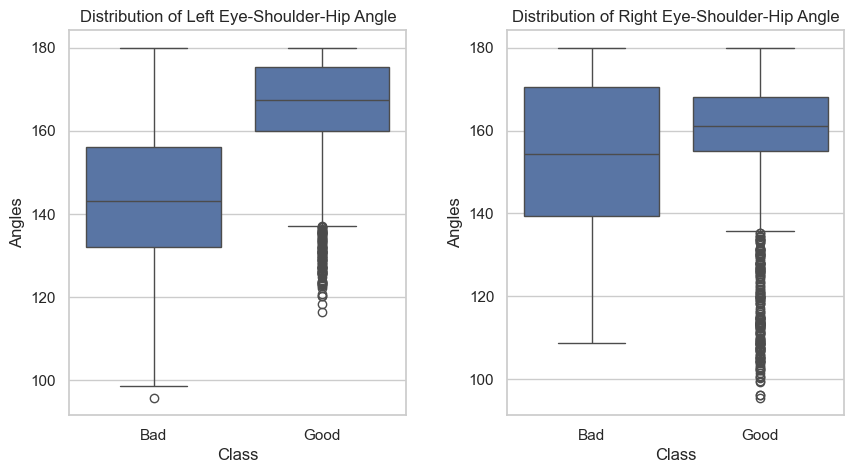

In [83]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot in each subplot
sns.boxplot(x='class', y='left_EyeSH', data=df, ax=ax1)
sns.boxplot(x='class', y='right_EyeSH', data=df, ax=ax2)

# Add labels and titles to the subplots
ax1.set_xlabel('Class')
ax1.set_ylabel('Angles')
ax1.set_title('Distribution of Left Eye-Shoulder-Hip Angle')

ax2.set_xlabel('Class')
ax2.set_ylabel('Angles')
ax2.set_title('Distribution of Right Eye-Shoulder-Hip Angle')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

Ear-Shoulder-Hip

In [84]:
df['left_ESH'] = calculate_angle(left_ear,left_shoulder,left_hip)
df['right_ESH'] = calculate_angle(right_ear, right_shoulder, right_hip)
df[['class','left_ESH','right_ESH']]

,class,left_ESH,right_ESH
0,Bad,163.510284,178.116644
1,Bad,173.068362,179.864711
2,Bad,178.625314,173.993331
3,Bad,173.384369,173.911822
4,Bad,170.893832,176.967896
...,...,...,...
8364,Good,174.313906,163.099885
8365,Good,173.078652,162.462970
8366,Good,171.908993,162.051717
8367,Good,160.705069,178.371101


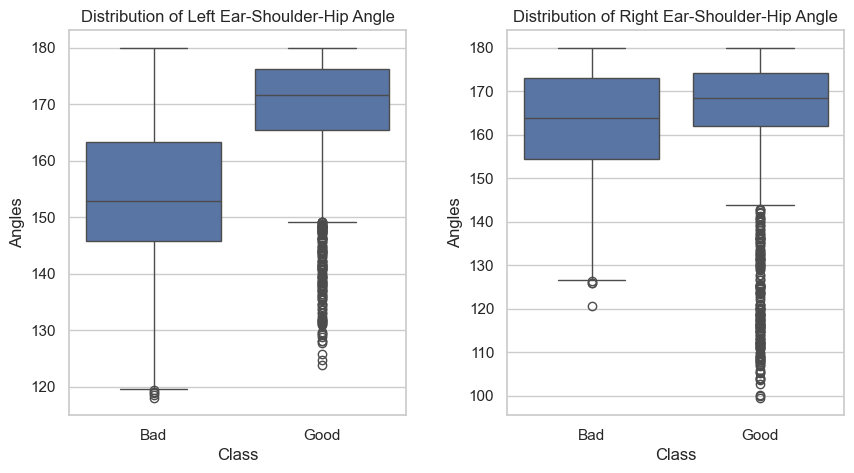

In [85]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot in each subplot
sns.boxplot(x='class', y='left_ESH', data=df, ax=ax1)
sns.boxplot(x='class', y='right_ESH', data=df, ax=ax2)

# Add labels and titles to the subplots
ax1.set_xlabel('Class')
ax1.set_ylabel('Angles')
ax1.set_title('Distribution of Left Ear-Shoulder-Hip Angle')

ax2.set_xlabel('Class')
ax2.set_ylabel('Angles')
ax2.set_title('Distribution of Right Ear-Shoulder-Hip Angle')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


# eda do left side only
# plot images on notebook

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


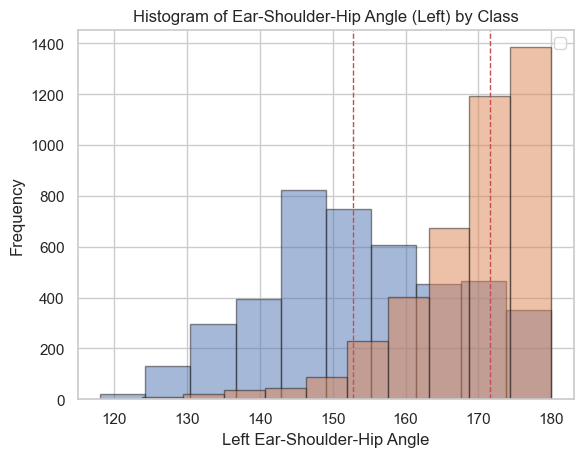

In [86]:

histograms = {}

for class_label in df['class'].unique():
    class_df = df[df['class'] == class_label]
    counts, bins, patches = plt.hist(class_df['left_ESH'], edgecolor='k', alpha=0.5)
    
    # Calculate the median for the current class
    median_value = np.median(class_df['left_ESH'])
    
    # Draw a vertical line at the median position
    plt.axvline(median_value, color='r', linestyle='dashed', linewidth=1)
    
    # Store histogram data in the dictionary
    histograms[class_label] = {'counts': counts, 'bins': bins, 'median': median_value}

# Set the x- and y-axis labels
plt.xlabel('Left Ear-Shoulder-Hip Angle')
plt.ylabel('Frequency')

# Set the title of the plot
plt.title('Histogram of Ear-Shoulder-Hip Angle (Left) by Class')

# Add a legend to the plot
plt.legend()
plt.show()


Nose-Shoulder-Hip

In [87]:
df['left_NSH'] = calculate_angle(nose,left_shoulder,left_hip)
df['right_NSH'] = calculate_angle(nose, right_shoulder, right_hip)
df[['class','left_NSH','right_NSH']]

,class,left_NSH,right_NSH
0,Bad,143.535033,161.939258
1,Bad,153.054688,159.226312
2,Bad,161.336623,153.260392
3,Bad,155.536213,153.985592
4,Bad,152.749715,157.711976
...,...,...,...
8364,Good,174.887152,148.161698
8365,Good,176.403710,147.421517
8366,Good,177.820674,147.042902
8367,Good,142.469704,169.214373


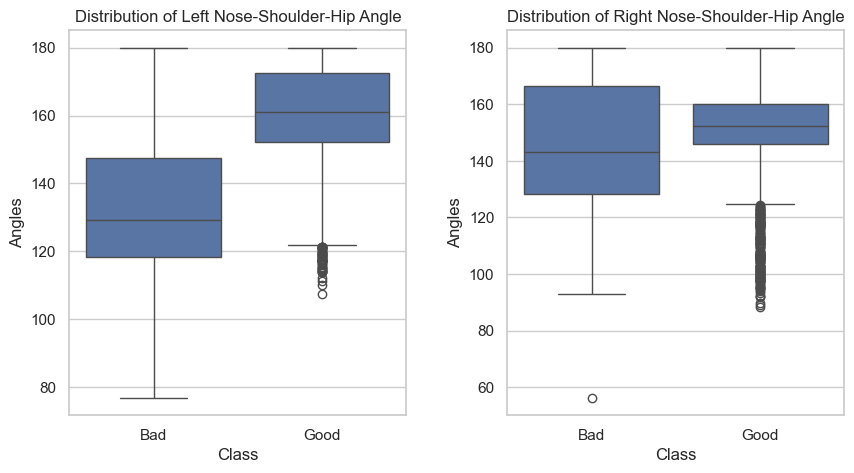

In [88]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot in each subplot
sns.boxplot(x='class', y='left_NSH', data=df, ax=ax1)
sns.boxplot(x='class', y='right_NSH', data=df, ax=ax2)

# Add labels and titles to the subplots
ax1.set_xlabel('Class')
ax1.set_ylabel('Angles')
ax1.set_title('Distribution of Left Nose-Shoulder-Hip Angle')

ax2.set_xlabel('Class')
ax2.set_ylabel('Angles')
ax2.set_title('Distribution of Right Nose-Shoulder-Hip Angle')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

In [89]:
df.columns

Index(['class', 'x1', 'y1', 'z1', 'v1', 'x2', 'y2', 'z2', 'v2', 'x3',
       ...
       'y33', 'z33', 'v33', 'good_posture', 'left_EyeSH', 'right_EyeSH',
       'left_ESH', 'right_ESH', 'left_NSH', 'right_NSH'],
      dtype='object', length=140)

Shoulder-Hip-Knee

In [90]:
df['left_SHK'] = calculate_angle(left_shoulder,left_hip, left_knee)
df['right_SHK'] = calculate_angle(right_shoulder, right_hip, right_knee)
df[['class','left_SHK','right_SHK']]

,class,left_SHK,right_SHK
0,Bad,147.515758,146.922322
1,Bad,149.645177,148.347381
2,Bad,150.563715,147.488250
3,Bad,155.709640,150.075273
4,Bad,158.154844,151.350972
...,...,...,...
8364,Good,178.568026,149.955519
8365,Good,179.207845,148.603204
8366,Good,177.911552,148.732710
8367,Good,145.753599,172.098057


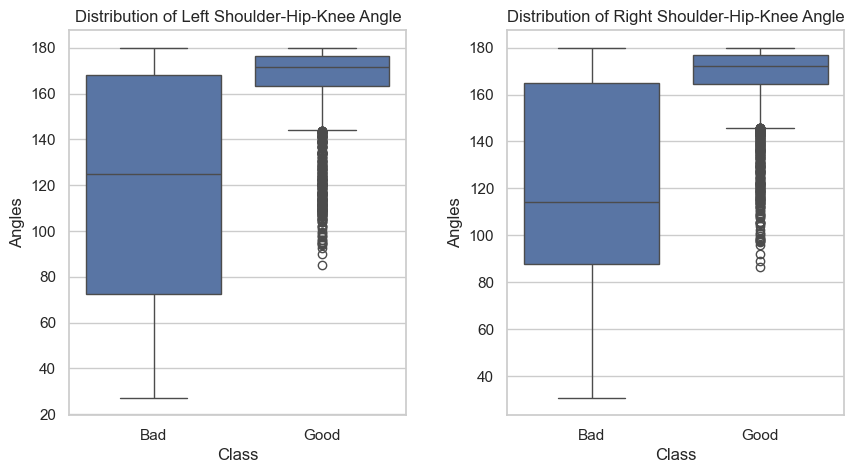

In [91]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Create a box plot in each subplot
sns.boxplot(x='class', y='left_SHK', data=df, ax=ax1)
sns.boxplot(x='class', y='right_SHK', data=df, ax=ax2)

# Add labels and titles to the subplots
ax1.set_xlabel('Class')
ax1.set_ylabel('Angles')
ax1.set_title('Distribution of Left Shoulder-Hip-Knee Angle')

ax2.set_xlabel('Class')
ax2.set_ylabel('Angles')
ax2.set_title('Distribution of Right Shoulder-Hip-Knee Angle')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()

Correlation Heatmap for calculated angles

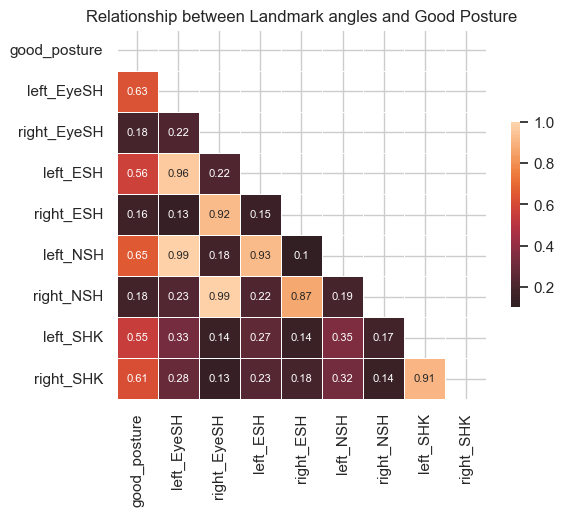

In [102]:
selected_columns = ['good_posture','left_EyeSH', 'right_EyeSH','left_ESH', 'right_ESH', 'left_NSH', 'right_NSH','left_SHK','right_SHK']

# Calculate the correlation matrix for selected columns
correlation_matrix = df[selected_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot_kws={"fontsize": 8})

plt.title('Relationship between Landmark angles and Good Posture')
plt.show()

In [97]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,v33,good_posture,left_EyeSH,right_EyeSH,left_ESH,right_ESH,left_NSH,right_NSH,left_SHK,right_SHK
0,Bad,0.597514,0.330045,-0.046739,0.999786,0.595233,0.314657,-0.039935,0.999435,0.594381,...,0.995285,0,155.307020,172.507026,163.510284,178.116644,143.535033,161.939258,147.515758,146.922322
1,Bad,0.603381,0.325570,-0.049170,0.999806,0.601188,0.310604,-0.040726,0.999489,0.600242,...,0.994957,0,163.544608,169.504665,173.068362,179.864711,153.054688,159.226312,149.645177,148.347381
2,Bad,0.614878,0.315903,-0.031407,0.999825,0.613352,0.302009,-0.020730,0.999540,0.612598,...,0.995270,0,169.634487,163.841305,178.625314,173.993331,161.336623,153.260392,150.563715,147.488250
3,Bad,0.624886,0.308227,-0.035477,0.999842,0.623481,0.295145,-0.026631,0.999585,0.622720,...,0.995534,0,164.198492,163.581827,173.384369,173.911822,155.536213,153.985592,155.709640,150.075273
4,Bad,0.636889,0.295799,-0.043732,0.999856,0.634686,0.282637,-0.032385,0.999624,0.634024,...,0.995753,0,161.850092,166.930504,170.893832,176.967896,152.749715,157.711976,158.154844,151.350972


In [98]:
df.to_csv('model_df.csv', index=False)

In [94]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Create a 3D figure
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Generate two random points
# point1 = np.random.rand(3)
# point2 = np.random.rand(3)

# # Plot the two points as 3D scatter points
# ax.scatter(point1[0], point1[1], point1[2], c='red')
# ax.scatter(point2[0], point2[1], point2[2], c='blue')

# # Set the axis labels
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # Connect the two points with a line
# ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], c='black', linestyle='-')

# # Display the plot
# plt.show()